In [23]:
#importing requires Libraries
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Listing files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the data
path = '/content/drive/MyDrive/Coffee Shop Sales.xlsx'
df = pd.read_excel(path)


In [44]:
# Displaying the relevant columns of the dataframe
df['total_cost'] = df['transaction_qty'] * df['unit_price']
df['Month'] = pd.to_datetime(df['transaction_date']).dt.to_period('M')
df_relevant = df[['transaction_date', 'Month', 'total_cost', 'product_type']]
print(df_relevant.head())

  transaction_date    Month  total_cost           product_type
0       2023-01-01  2023-01         6.0  Gourmet brewed coffee
1       2023-01-01  2023-01         6.2        Brewed Chai tea
2       2023-01-01  2023-01         9.0          Hot chocolate
3       2023-01-01  2023-01         2.0            Drip coffee
4       2023-01-01  2023-01         6.2        Brewed Chai tea


In [32]:
# Displaying the last 5 transaction dates
print(df['transaction_date'].tail())

149111   2023-06-30
149112   2023-06-30
149113   2023-06-30
149114   2023-06-30
149115   2023-06-30
Name: transaction_date, dtype: datetime64[ns]


In [33]:
# Calculating total sales for each month
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Month'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['total_cost'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
print(monthly_sales)


     Month  total_cost
0  2023-01    81677.74
1  2023-02    76145.19
2  2023-03    98834.68
3  2023-04   118941.08
4  2023-05   156727.76
5  2023-06   166485.88


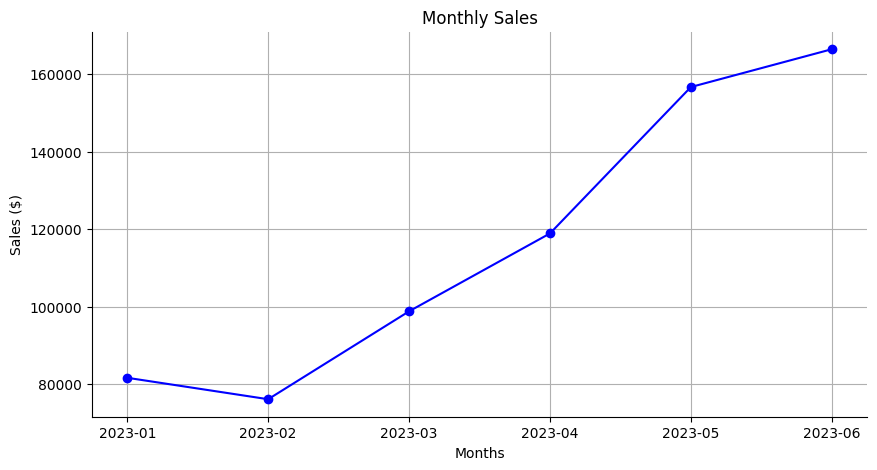

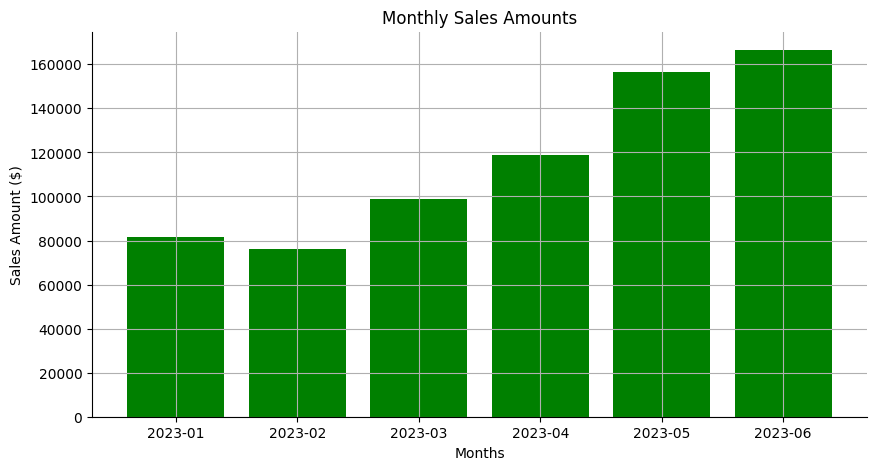

In [34]:
# Data visualization
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['total_cost'], marker='o', color='b')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(monthly_sales['Month'], monthly_sales['total_cost'], color='g')
plt.title('Monthly Sales Amounts')
plt.xlabel('Months')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [35]:
# Machine Learning: Predicting future sales
# Convert Month to numerical format for ML model
monthly_sales['Month_num'] = pd.to_datetime(monthly_sales['Month']).map(pd.Timestamp.toordinal)
# Preparing data for model
X = monthly_sales[['Month_num']]
y = monthly_sales['total_cost']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 418969916.05479974
R-squared: -53.75101012273224


In [51]:
# Predicting future sales
future_months = pd.date_range(start='2023-07-01', periods=6, freq='M').to_period('M')
future_month_nums = future_months.to_timestamp().map(pd.Timestamp.toordinal).to_frame(name='Month_num')
future_sales_predictions = model.predict(future_month_nums)

future_sales = pd.DataFrame({
    'Month': future_months.astype(str),
    'Predicted_Sales': future_sales_predictions
})

print(future_sales)


     Month  Predicted_Sales
0  2023-07    194962.303097
1  2023-08    219319.718176
2  2023-09    243677.133255
3  2023-10    267248.825267
4  2023-11    291606.240346
5  2023-12    315177.932358


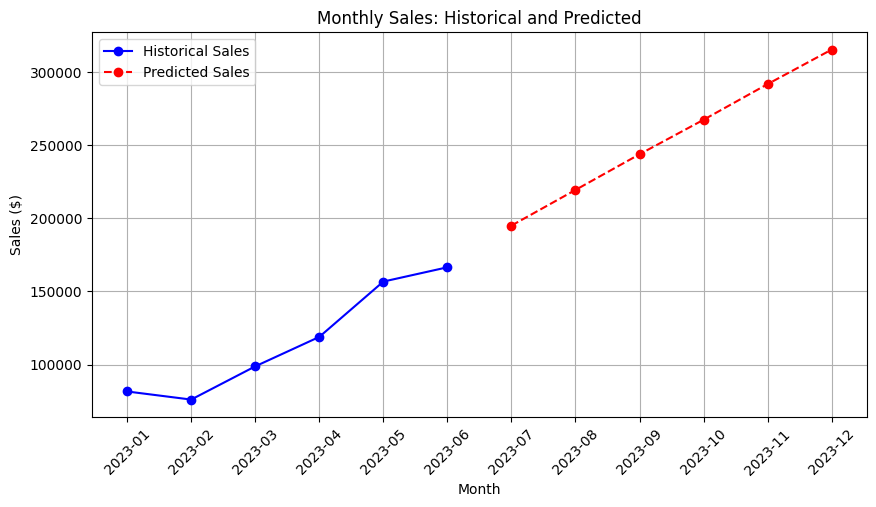

In [52]:
# Visualizing future sales predictions
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['total_cost'], marker='o', color='b', label='Historical Sales')
plt.plot(future_sales['Month'], future_sales['Predicted_Sales'], marker='o', color='r', linestyle='--', label='Predicted Sales')
plt.title('Monthly Sales: Historical and Predicted')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 908111371.9073001
Root Mean Squared Error: 30134.88629325321
R-squared: -117.67204066595
     Month  Predicted_Sales
0  2023-07       160992.598
1  2023-08       160992.598
2  2023-09       160992.598
3  2023-10       160992.598
4  2023-11       160992.598
5  2023-12       160992.598


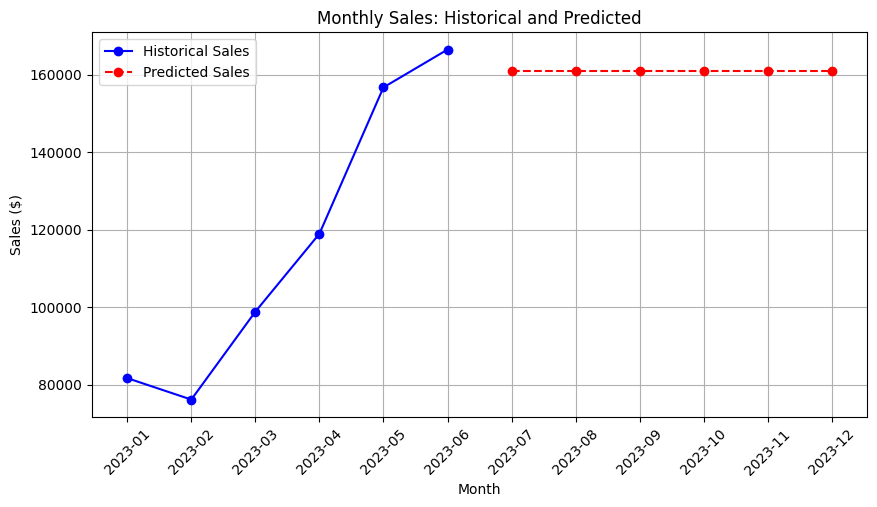

In [54]:
#NOW USING RandomForestRegressor

# Creating and training the model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Predicting future sales
future_months = pd.date_range(start='2023-07-01', periods=6, freq='M').to_period('M')
future_month_nums = future_months.to_timestamp().map(pd.Timestamp.toordinal).to_frame(name='Month_num')
future_sales_predictions = model.predict(future_month_nums)

future_sales = pd.DataFrame({
    'Month': future_months.astype(str),
    'Predicted_Sales': future_sales_predictions
})

print(future_sales)

# Visualizing future sales predictions
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['total_cost'], marker='o', color='b', label='Historical Sales')
plt.plot(future_sales['Month'], future_sales['Predicted_Sales'], marker='o', color='r', linestyle='--', label='Predicted Sales')
plt.title('Monthly Sales: Historical and Predicted')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# I Tried chaging the hyperparameters but doesnt refelected enough chaanges , so I am going to use Gradient Boosting Machines
import xgboost as xgb

In [57]:
# Creating and training the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Predicting future sales
future_months = pd.date_range(start='2023-07-01', periods=6, freq='M').to_period('M')
future_month_nums = future_months.to_timestamp().map(pd.Timestamp.toordinal).to_frame(name='Month_num')
future_sales_predictions = model.predict(future_month_nums)

Mean Squared Error: 404587694.76107836
Root Mean Squared Error: 20114.365383006207
R-squared: -51.87154070627676


     Month  Predicted_Sales
0  2023-07    166485.828125
1  2023-08    166485.828125
2  2023-09    166485.828125
3  2023-10    166485.828125
4  2023-11    166485.828125
5  2023-12    166485.828125


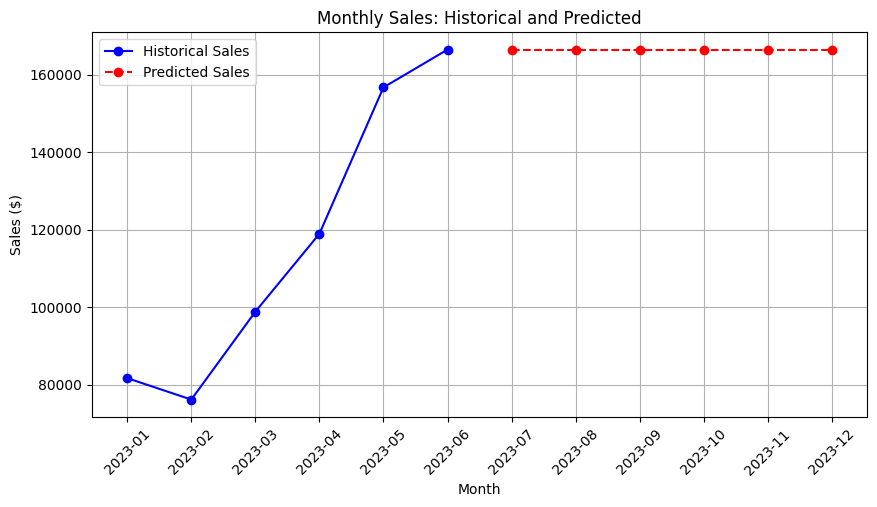

In [58]:
future_sales = pd.DataFrame({
    'Month': future_months.astype(str),
    'Predicted_Sales': future_sales_predictions
})

print(future_sales)

# Visualizing future sales predictions
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['total_cost'], marker='o', color='b', label='Historical Sales')
plt.plot(future_sales['Month'], future_sales['Predicted_Sales'], marker='o', color='r', linestyle='--', label='Predicted Sales')
plt.title('Monthly Sales: Historical and Predicted')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [74]:
#CHECKING THE BEST HYPER PARAMETERS OF BOOSTER MODEL
from sklearn.model_selection import GridSearchCV
# Define the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0

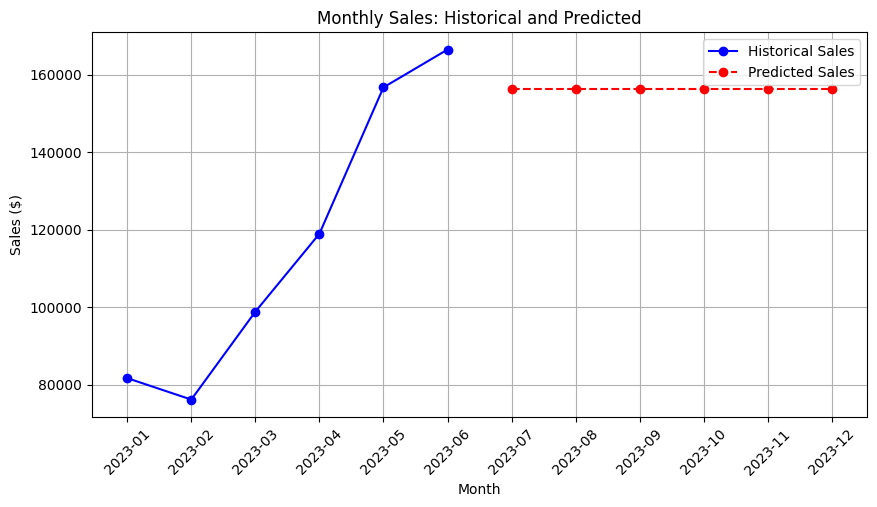

In [76]:
# Convert Month to numerical format for ML model
monthly_sales['Month_num'] = pd.to_datetime(monthly_sales['Month']).map(pd.Timestamp.toordinal)

# Preparing data for model
X = monthly_sales[['Month_num']]
y = monthly_sales['total_cost']

# Define the XGBoost model with best hyperparameters
model = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6, objective='reg:squarederror', random_state=42)

# Train the model on the entire dataset
model.fit(X, y)

# Predicting future sales
future_months = pd.date_range(start='2023-07-01', periods=6, freq='M')
future_month_nums = future_months.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
future_sales_predictions = model.predict(future_month_nums)

# Create a DataFrame for future predictions
future_sales = pd.DataFrame({
    'Month': future_months.strftime('%Y-%m'),  # Format the date to match historical data format
    'Predicted_Sales': future_sales_predictions
})

# Plotting the predictions
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['total_cost'], marker='o', color='b', label='Historical Sales')
plt.plot(future_sales['Month'], future_sales['Predicted_Sales'], marker='o', color='r', linestyle='--', label='Predicted Sales')
plt.title('Monthly Sales: Historical and Predicted')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()